#The natural osciilations of a fluid sphere

In this problem we solve Lane-Emden equation for a spherically symmetric fluid.

The polytropic equation of state is given as $P = K \rho^{1+\frac{1}{n}}$. From the equations for mass conservation $\frac{dm}{dr}$ and pressure $\frac{dP}{dr}$ we get the hydrostatic equilibrium equation:

\begin{equation}
  \frac{1}{r^2} \frac{d}{dr} \left( \frac{r^2}{\rho} \frac{dP}{dr} \right) = -4 \pi G \rho
\end{equation}

This can be further simplified to a dimenstionless form:

\begin{equation}
  \frac{1}{\xi^2}\frac{d}{d \xi} \left( \xi^2 \frac{d \theta}{d \xi} \right) = -\theta^{n}
\end{equation}

Here $\rho = \rho_c \theta^n$, $r = a \xi$, $a = \left( \frac{(n+1)K\rho_c^{1/n -1}}{4 \pi G} \right)^{1/2}$, and n is the polytropic index.

The initial values are $\theta(0) = 1$ (corresponds to central density $\rho_c$) and $\theta'(0) = 0$.

The equation can be turned to:

\begin{equation}
  \frac{d}{d \xi} \frac{\theta}{\xi} = -\theta^n - \frac{2}{\xi} \frac{d\theta}{d\xi}
\end{equation}

If we take $\xi = x$, $\theta = y$, $\frac{d\theta}{d\xi} = z$, we can solve it with 4th order Runge-Kutta with initial values $y(0) = 1$, $z(0) = 0$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def f(z):
  return z

def g(x, y, z, n):
  if x < 1e-8:
    x = 1e-8
  return -y**n - 2*z/x

In [ ]:
def rk4(N, xi, xf, y0, z0, n):
  h = (xf - xi)/N
  x = np.linspace(xi, xf, N+1)
  y = np.zeros(N+1); z = np.zeros(N+1)

  y[0] = y0; z[0] = z0

  for i in range(N):
    k1 = h*f(z[i])
    l1 = h*g(x[i], y[i], z[i], n)

    k2 = h*f(z[i] + l1/2)
    l2 = h*g(x[i] + h/2, y[i] + k1/2, z[i] + l1/2, n)

    k3 = h*f(z[i] + l2/2)
    l3 = h*g(x[i] + h/2, y[i] + k2/2, z[i] + l2/2, n)

    k4 = h*f(z[i] + l3)
    l4 = h*g(x[i] + h, y[i] + k3, z[i] + l3, n)

    y[i+1] = y[i] + (k1 + 2*k2 + 2*k3 + k4)/6
    z[i+1] = z[i] + (l1 + 2*l2 + 2*l3 + l4)/6

  return x, y, z


In [ ]:
x_0, theta_0, dtheta_0 = rk4(1000, 0, 10, 1, 0, 0)
x_1, theta_1, dtheta_1 = rk4(1000, 0, 10, 1, 0, 1)
x_2, theta_2, dtheta_2 = rk4(1000, 0, 10, 1, 0, 2)
x_3, theta_3, dtheta_3 = rk4(1000, 0, 10, 1, 0, 3)
x_4, theta_4, dtheta_4 = rk4(1000, 0, 10, 1, 0, 4)
x_5, theta_5, dtheta_5 = rk4(1000, 0, 10, 1, 0, 5)

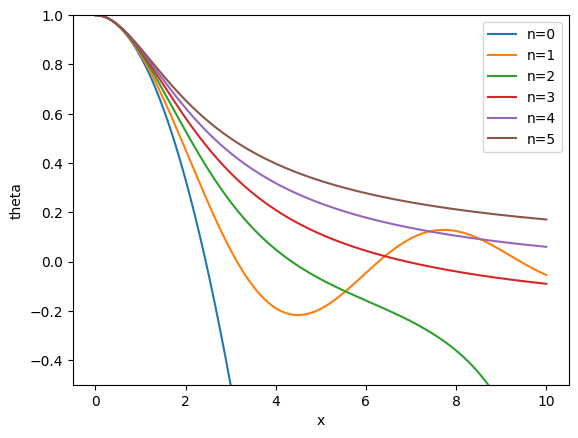

In [ ]:
plt.plot(x_0, theta_0, label = 'n=0')
plt.plot(x_1, theta_1, label = 'n=1')
plt.plot(x_2, theta_2, label = 'n=2')
plt.plot(x_3, theta_3, label = 'n=3')
plt.plot(x_4, theta_4, label = 'n=4')
plt.plot(x_5, theta_5, label = 'n=5')
plt.xlabel('x')
plt.ylabel('theta')
plt.legend()
plt.ylim(-0.5, 1)
plt.show()

This graph for different polytropic indices is exactly as the right solution.